In [1]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "../../data/prolific/"
DATA_FILE = "data_long.csv"

# read data as df
df = pd.read_csv(DATA_PATH + DATA_FILE)
# print(df["full_scenario"][10])
# print(df["condition"][10])
print(df["scenario_id"][10])


ids = list(df["scenario_id"])
splits = list(df["split"])
conditions = list(df["condition"])
from collections import Counter
print(Counter(ids))
print(Counter(splits))
print(Counter(conditions))
print(len(conditions))

3
Counter({9: 162, 5: 162, 3: 161, 4: 160, 0: 160, 2: 160, 7: 159, 6: 159, 8: 159, 1: 158})
Counter({1: 320, 0: 320, 4: 320, 2: 320, 3: 320})
Counter({'means_evitable_action_yes': 204, 'side_effect_inevitable_prevention_no': 200, 'side_effect_evitable_prevention_no': 200, 'side_effect_inevitable_action_yes': 200, 'means_inevitable_action_yes': 200, 'means_inevitable_prevention_no': 200, 'side_effect_evitable_action_yes': 199, 'means_evitable_prevention_no': 197})
1600


1600


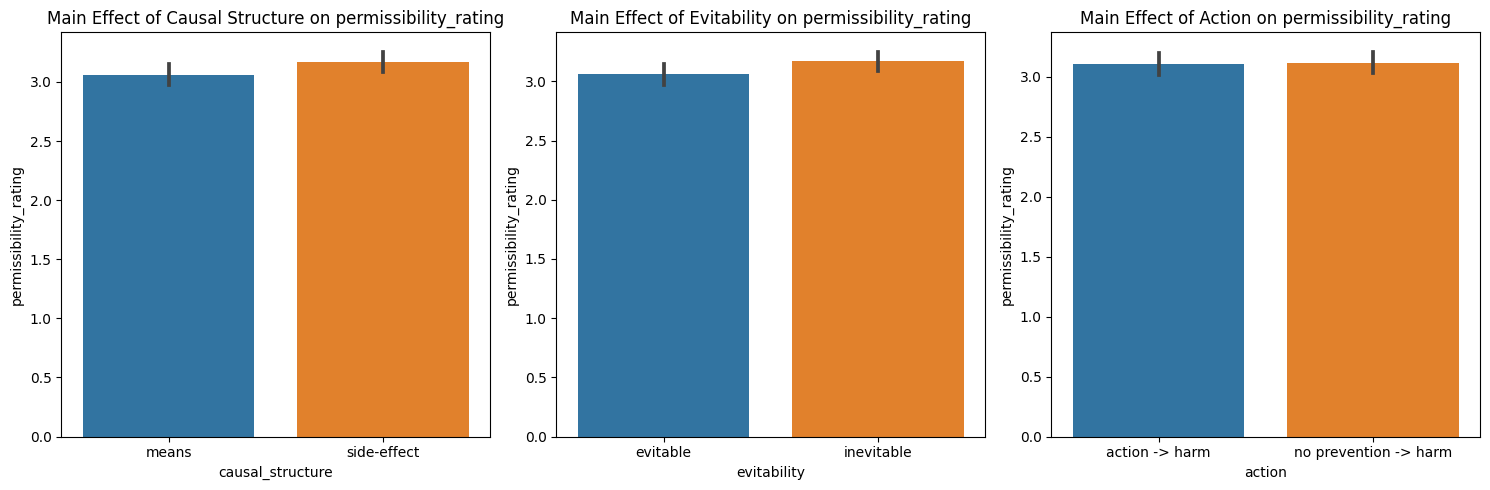

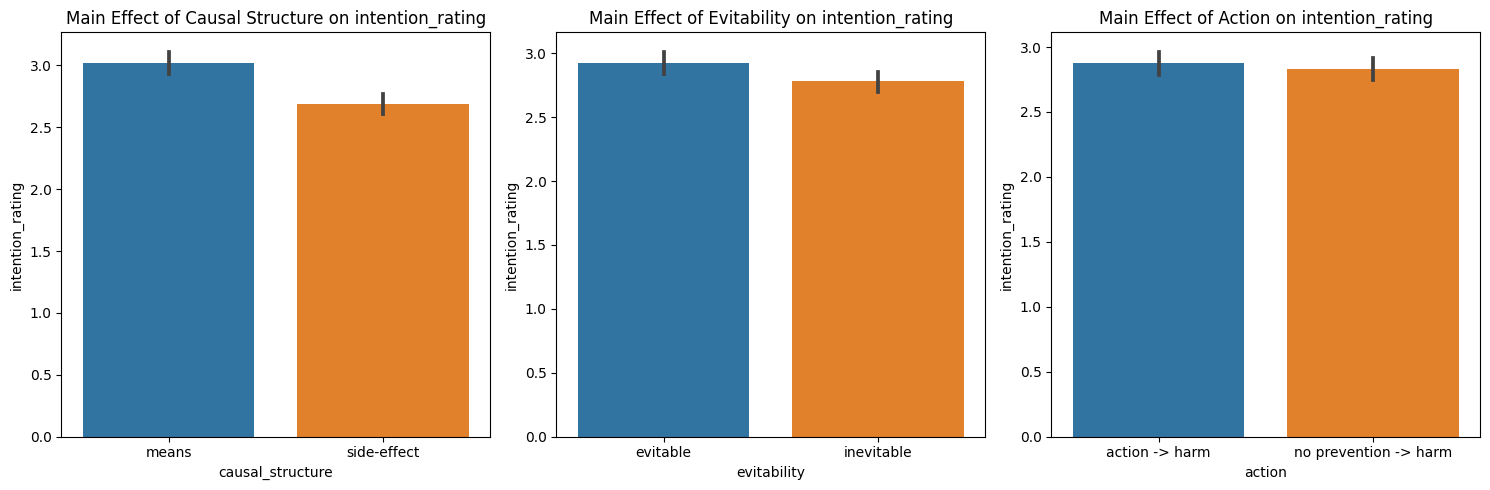

In [4]:
#permissibility_rating and intention_rating for the two levels of causal_structure
permissibilty = df['permissibility_rating'] 
scenario_id = df['scenario_id']
intention = df['intention_rating']
causal_structure = df['causal_structure']
evitability = df['evitability']
action = df['action']
print(len(action))



import seaborn as sns
import matplotlib.pyplot as plt

# Make sure your DataFrame is named df and has the mentioned columns
# df = ...

# Plot Main Effects
for dependent_var in ['permissibility_rating', 'intention_rating']:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.barplot(x='causal_structure', y=dependent_var, data=df)
    plt.title(f'Main Effect of Causal Structure on {dependent_var}')
    # x labels
    plt.xticks([0, 1], ['means', 'side-effect'])

    plt.subplot(1, 3, 2)
    sns.barplot(x='evitability', y=dependent_var, data=df)
    plt.title(f'Main Effect of Evitability on {dependent_var}')
    # x labels
    plt.xticks([0, 1], ['evitable', 'inevitable'])

    plt.subplot(1, 3, 3)
    sns.barplot(x='action', y=dependent_var, data=df)
    plt.title(f'Main Effect of Action on {dependent_var}')
    # x labels
    plt.xticks([0, 1], ['action -> harm', 'no prevention -> harm'])

    plt.tight_layout()
    plt.show()


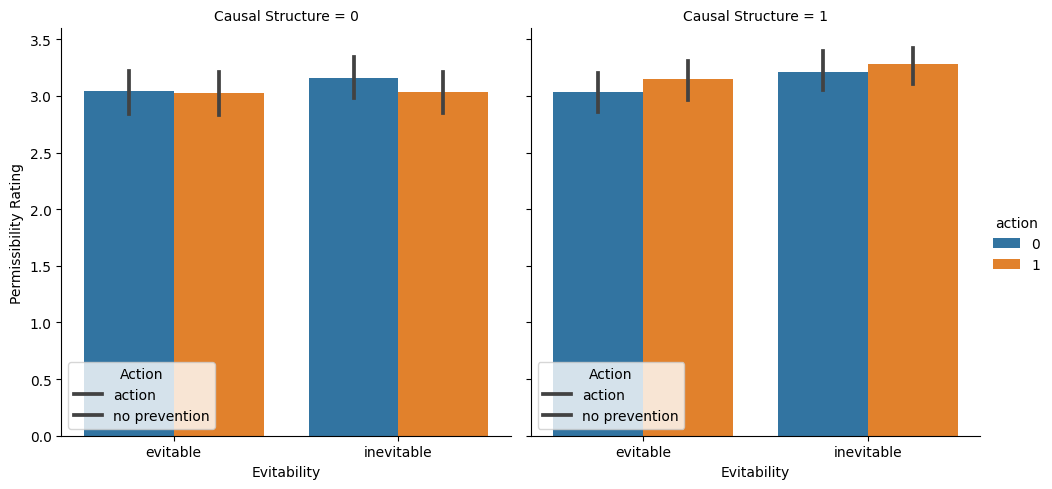

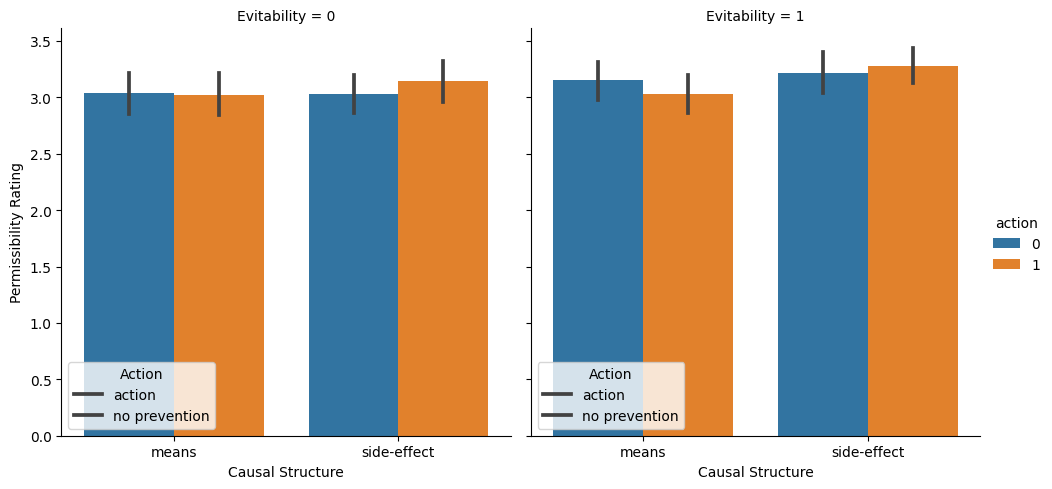

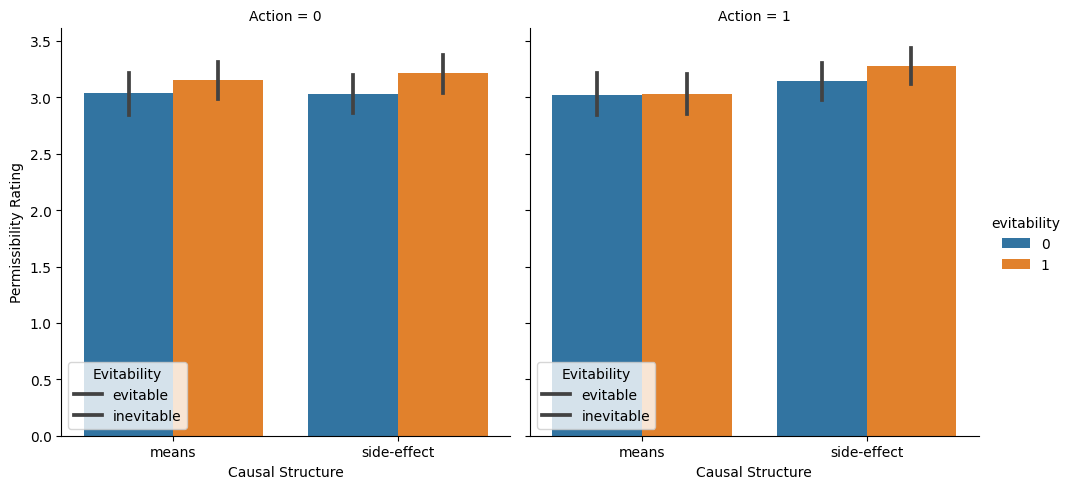

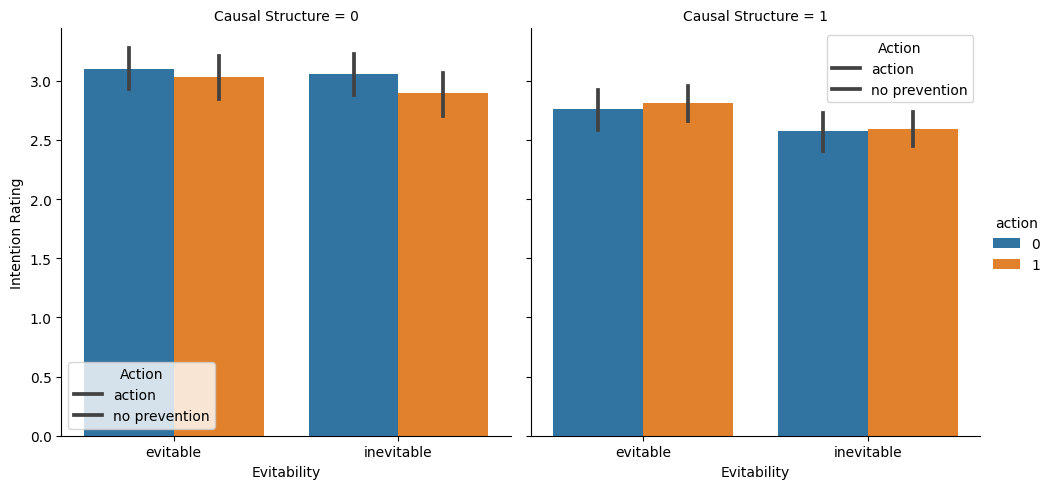

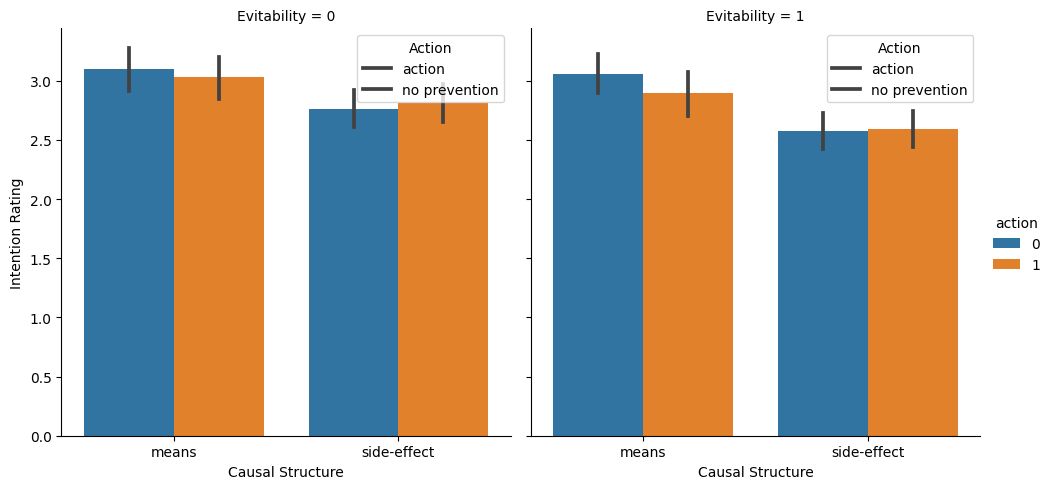

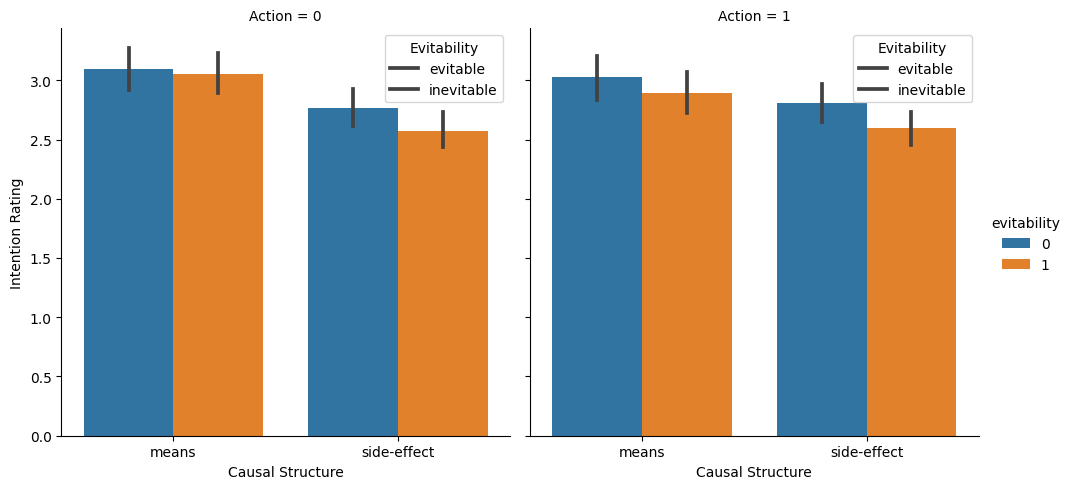

In [7]:
# Two-way interaction plots
for dependent_var in ['permissibility_rating', 'intention_rating']:
    for fixed_var in ['causal_structure', 'evitability', 'action']:
        variables = ['causal_structure', 'evitability', 'action']
        variables.remove(fixed_var)

        g = sns.catplot(x=variables[0], y=dependent_var, hue=variables[1], col=fixed_var, data=df, kind='bar')
        
        # Update titles and labels
        g.set_axis_labels(variables[0].replace('_', ' ').title(), dependent_var.replace('_', ' ').title())
        g.set_titles(f"{fixed_var.replace('_', ' ').title()} = {{col_name}}")
        
        for ax in g.axes.flat:
            if variables[0] == 'causal_structure':
                ax.set_xticklabels(['means', 'side-effect'])
            elif variables[0] == 'evitability':
                ax.set_xticklabels(['evitable', 'inevitable'])
            elif variables[0] == 'action':
                ax.set_xticklabels(['action', 'no prevention'])
                
            if variables[1] == 'causal_structure':
                legend_labels = ['means', 'side-effect']
            elif variables[1] == 'evitability':
                legend_labels = ['evitable', 'inevitable']
            elif variables[1] == 'action':
                legend_labels = ['action', 'no prevention']
            
            ax.legend(title=variables[1].replace('_', ' ').title(), labels=legend_labels)
        
        plt.show()
